# Naive Bayes

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn import preprocessing # LabelEncoder
from sklearn.preprocessing import MinMaxScaler # Escala los datos
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
import scikitplot as skplt 
from string import ascii_uppercase 
# import seaborn as sns
import qgrid
import time
#from sklearn.externals import joblib # Para guardar el modelo
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

from scipy import stats #Para la moda


## Naive Bayes
from sklearn.naive_bayes import GaussianNB

In [ ]:
def loadCSV(pathSamples, pathMatrix):
    df_loaded = pd.read_table(pathMatrix, sep=',')
    data = pd.read_table(pathSamples, sep=',')
    clin_trial_values = df_loaded.values
    
    Y = data['Eligible']
    Y = Y.astype(int)
    X = clin_trial_values[:, :]

In [4]:
def classification_error(y_est, y_real):
    err = 0
    for y_e, y_r in zip(y_est, y_real):

        if y_e != y_r:
            err += 1

    return err/np.size(y_est)

In [7]:
def plot_roc(Xtest, Ytest, probs, xlabel):
    ns_probs = [0 for _ in range(len(Ytest))]
    
    probs = probs[:, 1]
    ns_auc = roc_auc_score(Ytest, ns_probs)
    auc = roc_auc_score(Ytest, probs)  

    print('No Skill: ROC AUC=%.3f' % (ns_auc))
    print('Logistic: ROC AUC=%.3f' % (auc))

    ns_fpr, ns_tpr, _ = roc_curve(Ytest, ns_probs)
    fpr, tpr, _ = roc_curve(Ytest, probs)   

    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    plt.plot(fpr, tpr, marker='.', label= xlabel)

    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()

In [5]:
def model_NB(impresion = False):

    tiempo_i = time.time()
    accuracy_list_train = np.zeros([10])
    accuracy_list = np.zeros([10])
    precision_list = np.zeros([10,2])
    recall_list = np.zeros([10,2])
    f_list = np.zeros([10,2]) 
    errores = np.zeros(10)
    nb = GaussianNB()
    list_acc_mean = []
    list_acc_train_mean = []
    list_acc_std = []
    list_acc_train_std = []
    list_percentage = [0.05,0.10,0.15,0.20,0.25,0.3]
    
    for i in list_percentage:
        for j in range(10):
            Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=i) # Modificar metodología de validación
            scaler = MinMaxScaler()#Escala entre 0 y 1
            Xtrain = scaler.fit_transform(Xtrain)
            Xtest = scaler.transform(Xtest)

            nb.fit(Xtrain, Ytrain)
            pred = nb.predict(Xtest)
            pred_train = nb.predict(Xtrain)

            #code for calculating accuracy 
            _accuracy_ = accuracy_score(Ytest, pred, normalize=True)
            accuracy_list[j] = _accuracy_
        
            _accuracy_train_ = accuracy_score(Ytrain, pred_train, normalize=True)
            accuracy_list_train[j] = _accuracy_train_     

            #code for calculating recall 
            _recalls_ = recall_score(Ytest, pred, average=None)
            recall_list[j] = _recalls_

            #code for calculating precision 
            _precisions_ = precision_score(Ytest, pred, average=None)
            precision_list[j] = _precisions_

            _f_score_ = f1_score(Ytest, pred, average=None)
            f_list[j] = _f_score_

            errores[j] = classification_error(pred, Ytest)
            print(i, j)
            
        list_acc_mean.append(np.mean(accuracy_list))
        list_acc_std.append(np.std(accuracy_list))
        list_acc_train_mean.append(np.mean(accuracy_list_train))
        list_acc_train_std.append(np.std(accuracy_list_train))
          
    if impresion == True:
        
        x = [10000-(i* 10000) for i in list_percentage]
        sneg = [m-s for m,s in zip(list_acc_mean,list_acc_std)]
        spos = [m+s for m,s in zip(list_acc_mean,list_acc_std)]
        
        sneg_train = [m-s for m,s in zip(list_acc_train_mean,list_acc_train_std)]
        spos_train = [m+s for m,s in zip(list_acc_train_mean,list_acc_train_std)]
        
        fig1, ax1 = plt.subplots()
        
        ax1.fill_between(x,sneg_train,spos_train,alpha=.1)
        ax1.plot(x, list_acc_train_mean, marker = 'v', label = "train")
        ax1.fill_between(x,sneg,spos,alpha=.1)
        ax1.plot(x, list_acc_mean, marker = 'p', label = "test")

        ax1.set_xlabel("Número de muestras para train")
        ax1.set_ylabel("Accuracy")

        ax1.legend(loc="upper right", title="Curva de aprendizaje", frameon=False)
        plt.show()
            
        #Curva ROC
        nb_probs = nb.predict_proba(Xtest)
        
        plot_roc(Xtest, Ytest, nb_probs, "Naive Bayes")
        skplt.metrics.plot_confusion_matrix(Ytest, pred, normalize=True)

    return str(np.mean(accuracy_list)), str(np.std(accuracy_list)), str(np.mean(recall_list)), str(np.std(recall_list)), str(np.mean(precision_list)), str(np.std(precision_list)),  str(np.mean(f_list)), str(np.std(f_list)), str(np.mean(errores)), str(np.std(errores)), str(time.time()-tiempo_i)

## LSA, 10k, Sin caracteres especiales

In [ ]:
loadCSV("../../Dataset/10k_1Col_NoCarEsp_LSA.csv", "../../Tables/docsTopicsLSA1200.csv") #Cargar SCV

0.05 0
0.05 1
0.05 2
0.05 3
0.05 4
0.05 5
0.05 6
0.05 7
0.05 8
0.05 9
0.1 0
0.1 1
0.1 2
0.1 3
0.1 4
0.1 5
0.1 6
0.1 7
0.1 8
0.1 9
0.15 0
0.15 1
0.15 2
0.15 3
0.15 4
0.15 5
0.15 6
0.15 7
0.15 8
0.15 9
0.2 0
0.2 1
0.2 2
0.2 3
0.2 4
0.2 5
0.2 6
0.2 7
0.2 8
0.2 9
0.25 0
0.25 1
0.25 2
0.25 3
0.25 4
0.25 5
0.25 6
0.25 7
0.25 8
0.25 9
0.3 0
0.3 1
0.3 2
0.3 3
0.3 4
0.3 5
0.3 6
0.3 7
0.3 8
0.3 9


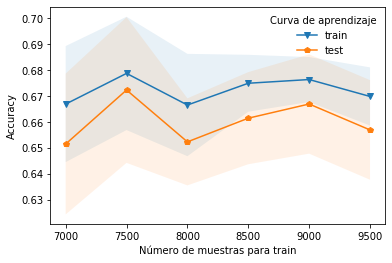

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.685


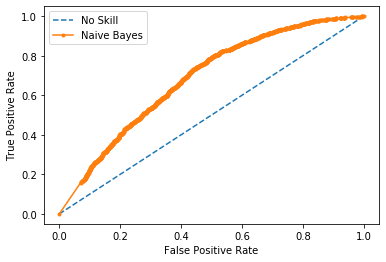

Accuracy 0.6515666666666665  Int_Accuracy 0.027148582938259506  Sensibility 0.6515268269162582  Int_Sensibility 0.11976582580470828  Precision 0.6597972297720134  Int_Precision 0.043793097719226556  F-Score 0.6465887714965731  Int_F-Score 0.051537775863006924  Error 0.34843333333333326  Int_Error 0.02714858293825951  Execution time 78.28215885162354


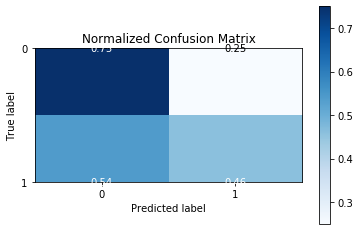

In [8]:
# Llamar función con el mejor modelo
Acc, IntAcc, Sen, IntSen, Pre, IntPre, f, IntF, error, stdError, tiempo = model_NB(impresion = True)
print('Accuracy',Acc, ' Int_Accuracy', IntAcc,' Sensibility', Sen, ' Int_Sensibility',IntSen,' Precision', Pre, ' Int_Precision',IntPre,' F-Score', f, ' Int_F-Score',IntF,' Error', error,' Int_Error', stdError,' Execution time', tiempo)